## IMPORT LIBRARIES



In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #avoid seaborn deprecation warning and get the exact same figure

## DATASET IMPORT and MOUNT


In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## PRE-PROCESSING

Null value: 0

Duplicate: 1

In [59]:
p_dataset = pd.read_csv("/content/drive/MyDrive/BRACU_Course/Current Course/CSE422/Labs/CSE422_Project/Project: Heart Attack Predictor/Datasets/heart.csv")


In [60]:
p_dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
p_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [62]:
p_dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [63]:
p_dataset[p_dataset.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [64]:
p_dataset.shape

(303, 14)

In [65]:
for i in p_dataset.columns:
    print(i,"=>",len(p_dataset[i].unique()))

age => 41
sex => 2
cp => 4
trtbps => 49
chol => 152
fbs => 2
restecg => 3
thalachh => 91
exng => 2
oldpeak => 40
slp => 3
caa => 5
thall => 4
output => 2


In [66]:
p_dataset.drop_duplicates(inplace=True)

In [67]:
p_dataset.shape

(302, 14)

## VISUALISATION DATASET


> **PAIR PLOT**





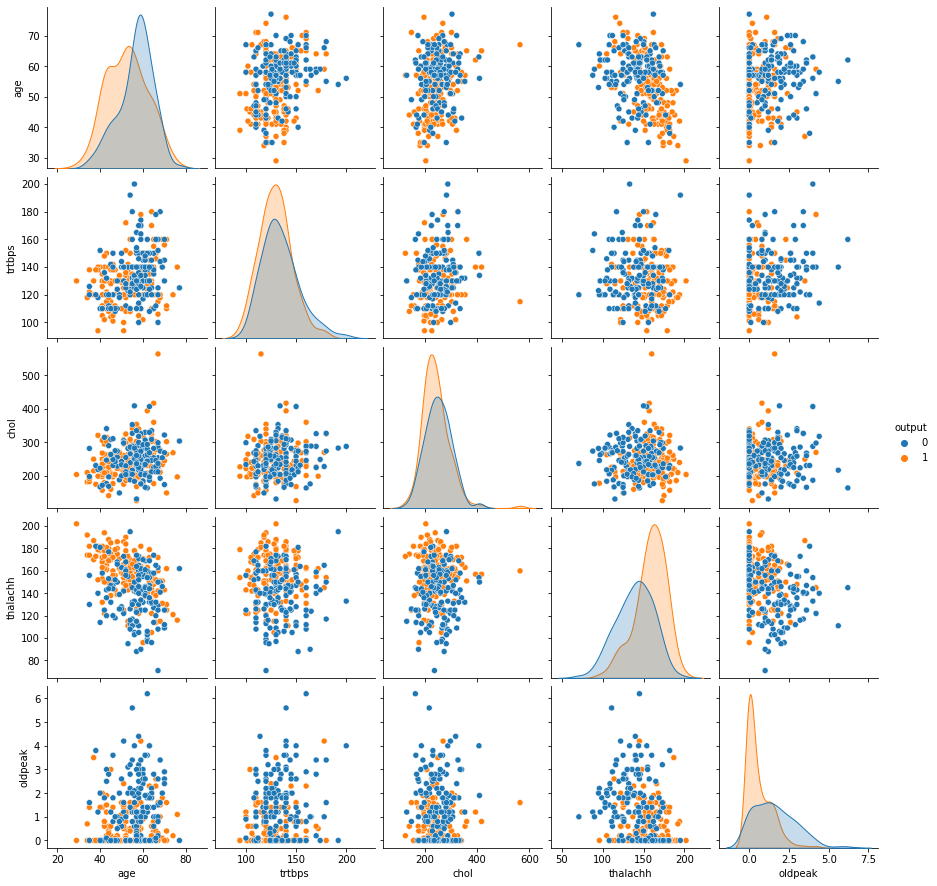

In [68]:
col = ["age","trtbps","chol","thalachh","oldpeak","output"]
sns.pairplot(p_dataset[col],hue="output")

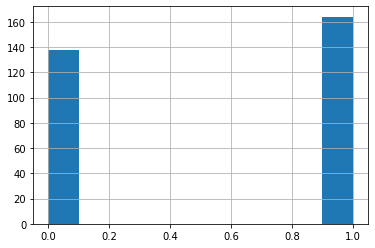

In [69]:
p_dataset['output'].hist()

## SPLIT DATA (FEATURE AND LABEL) AND TRAIN

In [70]:
features = p_dataset.drop(['output'], axis = 1)
target = p_dataset[['output']]

In [71]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 41.1 KB


In [72]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   output  302 non-null    int64
dtypes: int64(1)
memory usage: 12.8 KB


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state=1)
print(X_train.shape)
print(X_test.shape)

(211, 13)
(91, 13)


## LogisticRegression

In [74]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression(random_state=1, solver='lbfgs',multi_class='auto', max_iter=500)
LR_model.fit(X_train,y_train.values.ravel())

LogisticRegression(max_iter=500, random_state=1)

In [75]:
x=LR_model.predict(X_test)
x

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0])

In [76]:
s=LR_model.score(X_test,y_test)
LR=s*100
print('Logistic Regression accuracy:', s*100)

Logistic Regression accuracy: 79.12087912087912


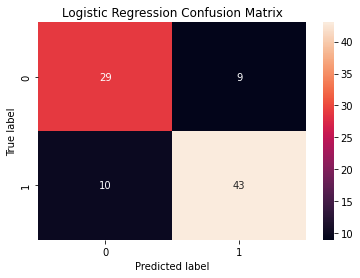

In [77]:
from sklearn.metrics import confusion_matrix,classification_report
plt.figure()
sns.heatmap(confusion_matrix(y_test, x), annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Logistic Regression Confusion Matrix");

## KNeighborsClassifier

In [78]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=3) # 3 cause feature=10 and root 10 = 3.6
KNN_model.fit(features,target.values.ravel()) # do not need to split train, test cause KNeighborsClassifier works on direct data

KNeighborsClassifier(n_neighbors=3)

In [79]:
s=KNN_model.score(features,target)
KNN=s*100
print('KNeighborsClassifier accuracy:', s*100)

KNeighborsClassifier accuracy: 75.82781456953643


In [80]:
x=KNN_model.predict(X_test)
x

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0])

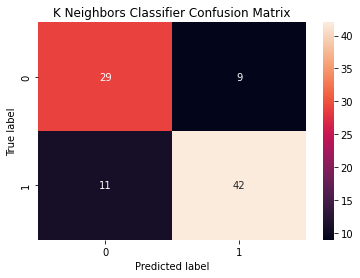

In [81]:
from sklearn.metrics import confusion_matrix,classification_report
plt.figure()
sns.heatmap(confusion_matrix(y_test, x), annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("K Neighbors Classifier Confusion Matrix");

# Decision Tree Classifier
**Without using any optimizing algorithm and parameter:**

Decision Tree Classifier Accuracy : 70.32967032967034

**After using parameter and optimizer:**

Decision Tree Classifier Accuracy : 71.42857142857143

In [82]:
###defining entropy
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts=True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

In [83]:
##Information Gain
def InfoGain(data,split_attribute_name,target_name="class_type"):
    total_entropy = entropy(data[target_name])
    vals,counts = np.unique(data[split_attribute_name],return_counts=True)
    #calculating the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name])for i in range(len(vals))])
    #Calculating infomation gain
    Information_Gain = total_entropy-Weighted_Entropy
    return Information_Gain

In [84]:
def ID3(data,originaldata,features,target_attribute_name="class_type", parent_node_class=None):
    #If all target_values have the same value, return this value
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    
    #if the dataset is empty
    elif len(data) == 0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],
                                                                           return_counts=True)[1])]

    #If the feature space is empty
    elif len(features) == 0:
        return parent_node_class 

    #If none of the above condition holds true grow the tree

    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],
                                                                           return_counts=True)[1])]

    #Select the feature which best splits the dataset
    item_values = [InfoGain(data,feature,target_attribute_name)for feature in features] #Return the infogain values
    best_feature_index = np.argmax(item_values)
    best_feature = features[best_feature_index]

    #Create the tree structure
    tree = {best_feature:{}}

    #Remove the feature with the best info gain
    features = [i for i in features if i!= best_feature]

    #Grow the tree branch under the root node

    for value in np.unique(data[best_feature]):
        value = value
        sub_data = data.where(data[best_feature]==value).dropna()
        #Recursive call of ID3 algotirthm
        subtree = ID3(sub_data,dataset,features,target_attribute_name,parent_node_class)
        #adding subtree to the main tree
        tree[best_feature][value] = subtree
    return(tree)

In [85]:
#Predict
def predict(query,tree,default=1):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
               result = tree[key][query[key]]
            except:
               return default

            result = tree[key][query[key]]
            if isinstance(result,dict):
                return predict(query,result)
            else:
                return result

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
DTC_model = tree.DecisionTreeClassifier(criterion='entropy',random_state=1)
DTC_model = DTC_model.fit(X_train,y_train)
y_pred = DTC_model.predict(X_test)

In [87]:
s=accuracy_score(y_pred,y_test)
DTC=s*100
print("Decision Tree Classifier Accuracy :", s*100)

Decision Tree Classifier Accuracy : 71.42857142857143


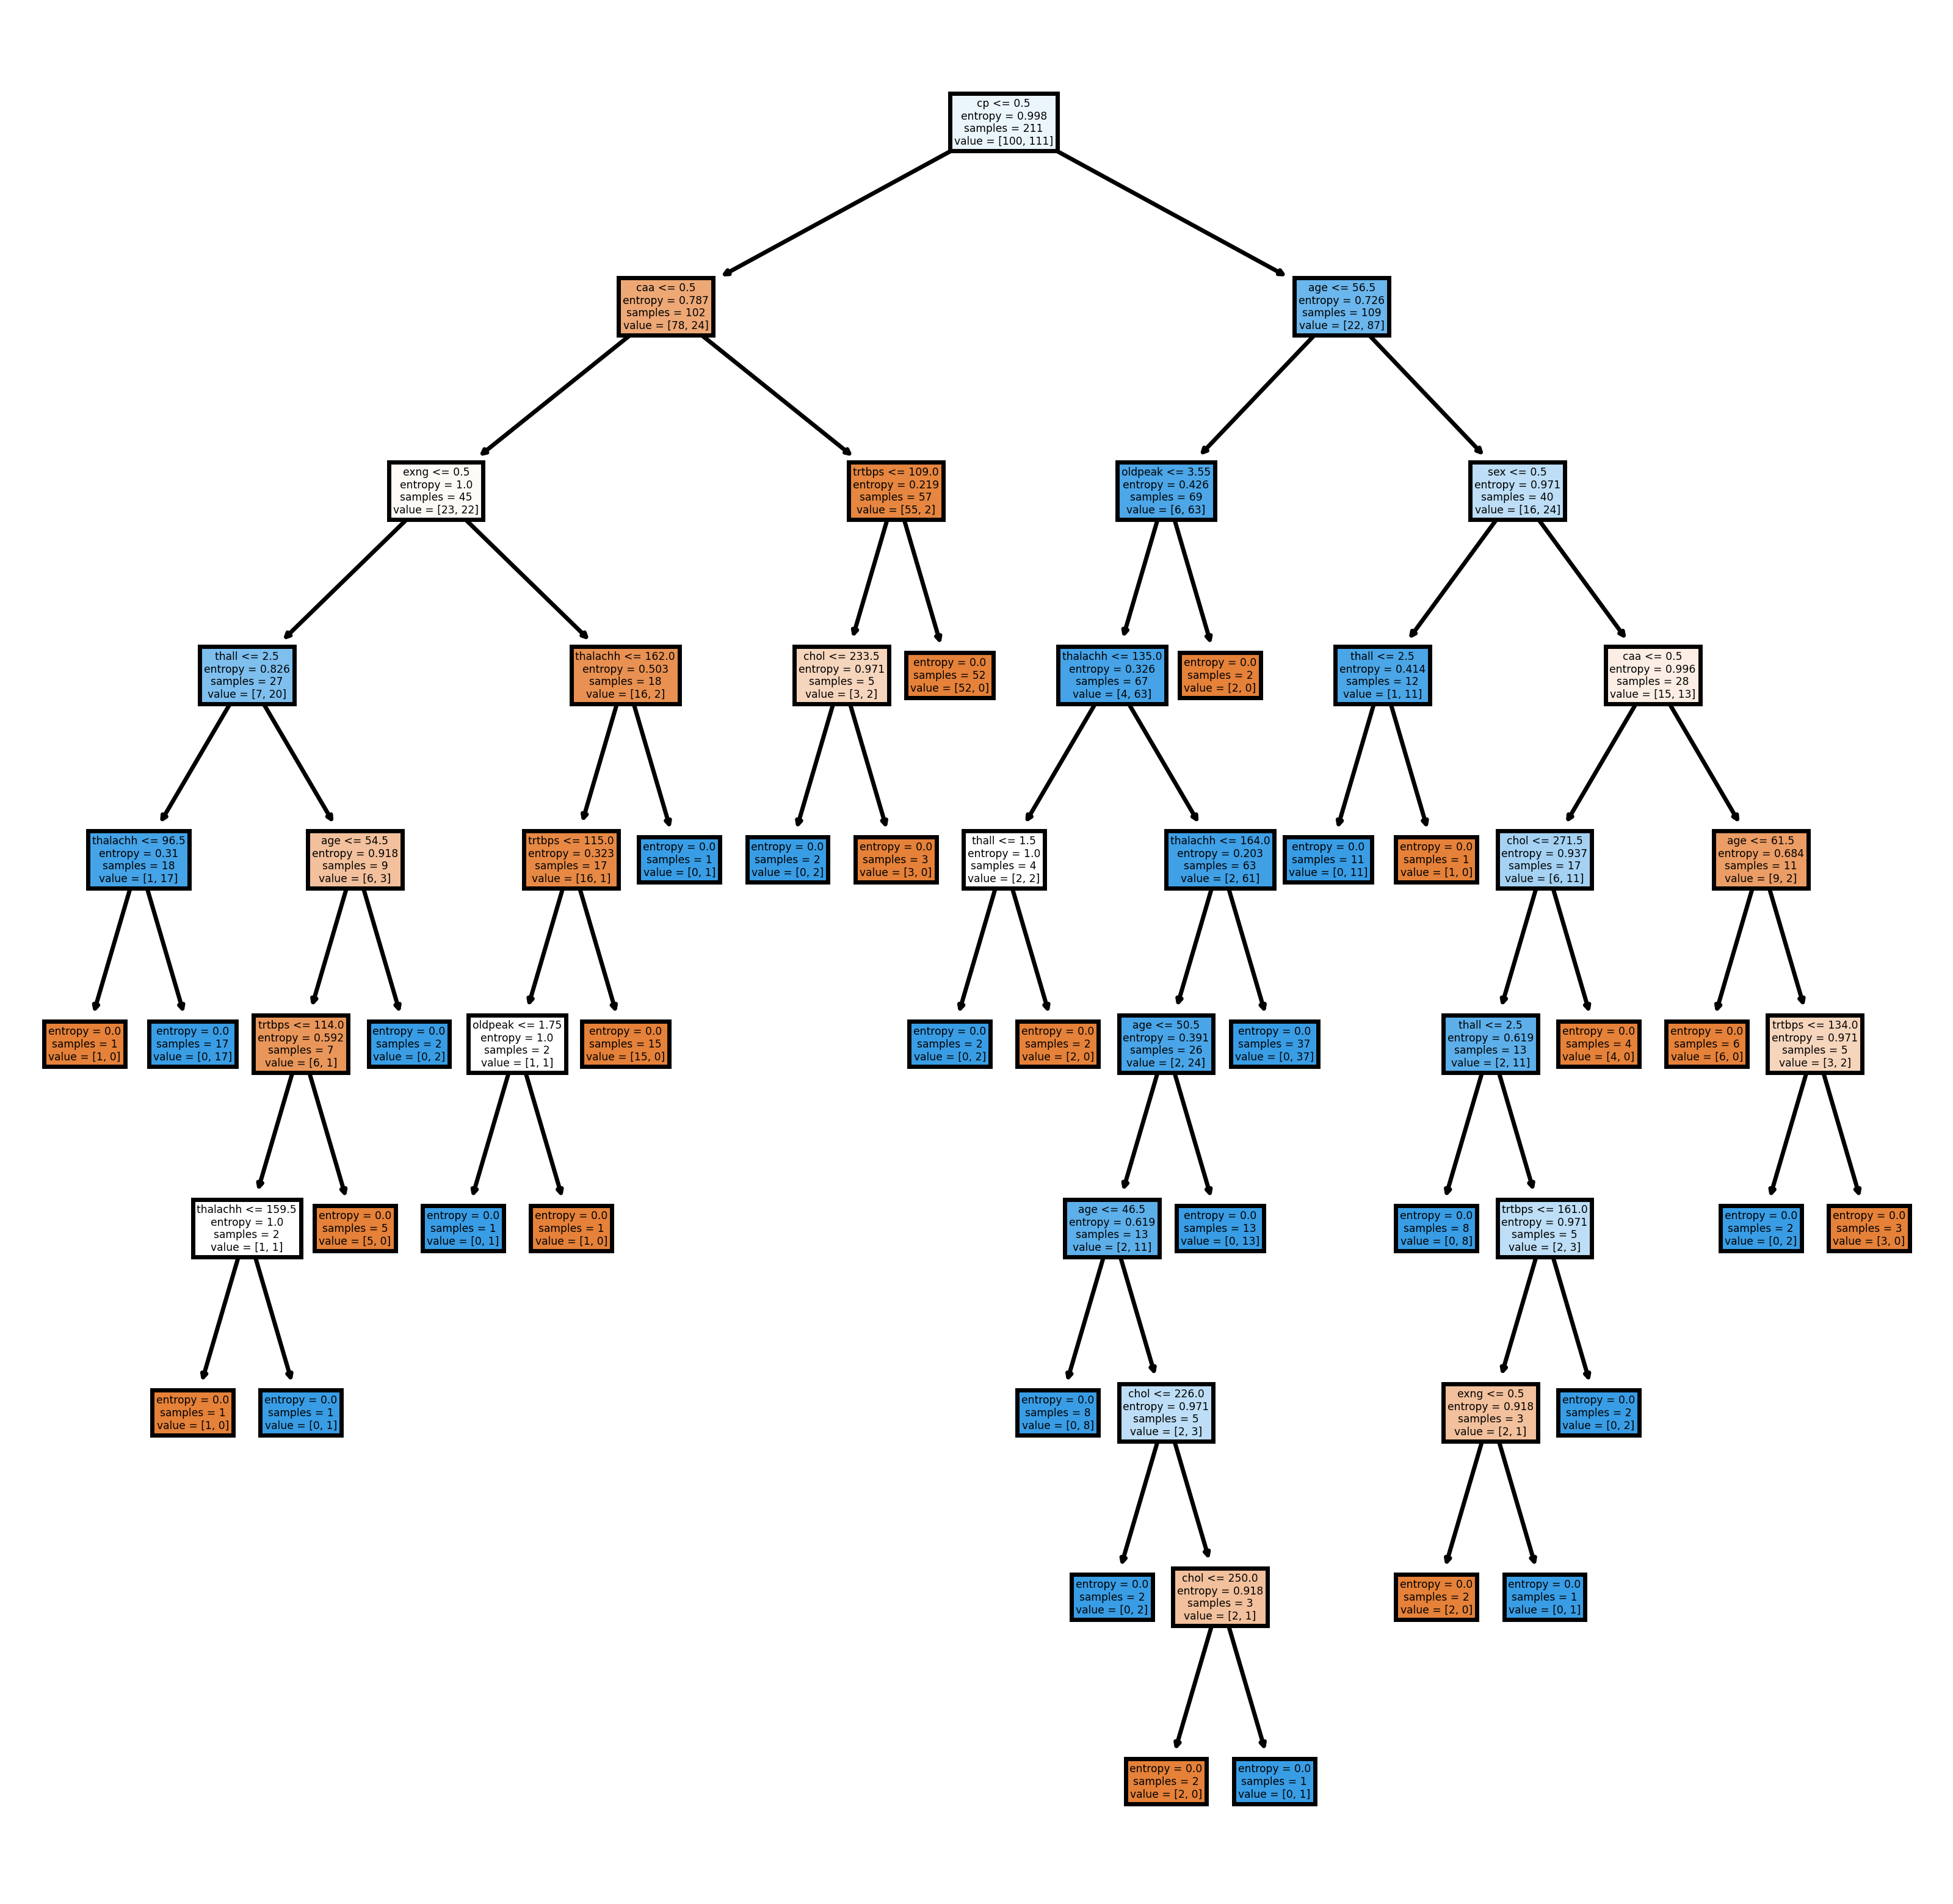

In [88]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=500)
tree.plot_tree(DTC_model.fit(X_train,y_train),feature_names = features.columns,filled = True);

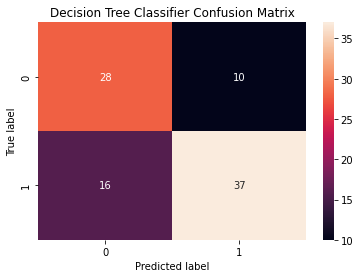

In [89]:
from sklearn.metrics import confusion_matrix,classification_report
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Decision Tree Classifier Confusion Matrix");

## Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [91]:
s=accuracy_score(y_pred,y_test)
RFC=s*100
print("Decision Tree Classifier Accuracy :", s*100)

Decision Tree Classifier Accuracy : 71.42857142857143


In [92]:
x=RFC_model.predict(X_test)
x

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0])

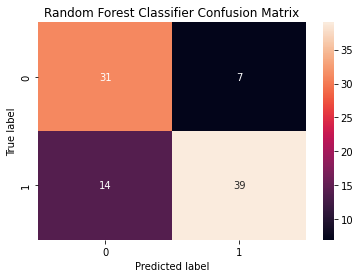

In [93]:
from sklearn.metrics import confusion_matrix,classification_report
plt.figure()
sns.heatmap(confusion_matrix(y_test, x), annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Random Forest Classifier Confusion Matrix");

## Naive Bayes

Naive Bayes Accuracy : 79.12087912087912

In [94]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train,y_train.values.ravel()) # values.ravel() for 1D arrray

GaussianNB()

In [95]:
s=NB_model.score(X_test,y_test)
NB=s*100
print("Naive Bayes Accuracy :", s*100)

Naive Bayes Accuracy : 79.12087912087912


In [96]:
x=NB_model.predict(X_test)
x

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0])

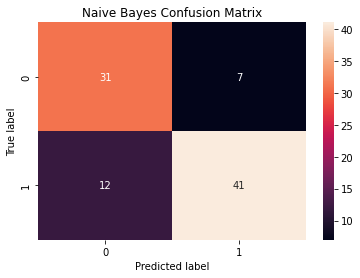

In [97]:
from sklearn.metrics import confusion_matrix,classification_report
plt.figure()
sns.heatmap(confusion_matrix(y_test, x), annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Naive Bayes Confusion Matrix");

## Neural Network Classifier
Neural Network Classifier: Effective in high dimensional spaces.

Neural Network Classifier Accuracy : 75.82417582417582


In [98]:
from sklearn.neural_network import MLPClassifier
NNC_model=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
NNC_model.fit(X_train,y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=7, max_iter=10000)

In [99]:
predictions = NNC_model.predict(X_test)

In [100]:
s=NNC_model.score(X_test,y_test)
NNC=s*100
print("Neural Network Classifier Accuracy :", s*100)

Neural Network Classifier Accuracy : 80.21978021978022


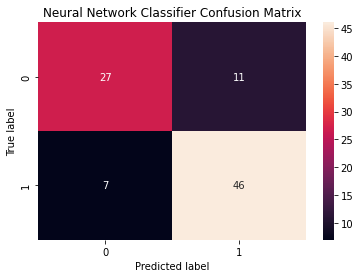

In [101]:
from sklearn.metrics import confusion_matrix,classification_report
plt.figure()
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Neural Network Classifier Confusion Matrix");

## Support Vector Classifier 
**SVC:**
Effective in high dimensional spaces. 


**Without using any optimizing algorithm and parameter**

Support Vector Classifier Accuracy : 65.93406593406593

**After using parameter and optimizer**

Support Vector Classifier Accuracy : 80.21978021978022

C= parameter

kernel= linear cause for svc we have 2D axis dataset and to avoid overfidding we try to shift the z axis to draw a linear line to estimate the data. if we use sigmoid then the accuracy will fall cause the line will touch many points and it effects the accuracy

random state= shuffling dataset




In [102]:
from sklearn.svm import SVC
SVC_model = SVC(C=10,kernel='linear',random_state=1)
SVC_model.fit(X_train, y_train.values.ravel())

SVC(C=10, kernel='linear', random_state=1)

In [103]:
s=SVC_model.score(X_test,y_test)
SVC=s*100
print("Support Vector Classifier Accuracy :", s*100)

Support Vector Classifier Accuracy : 80.21978021978022


In [104]:
x=SVC_model.predict(X_test)
x

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0])

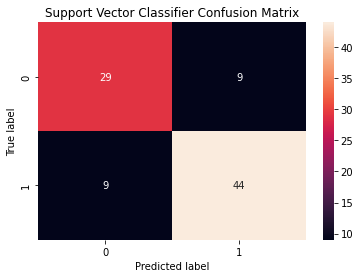

In [105]:
from sklearn.metrics import confusion_matrix,classification_report
plt.figure()
sns.heatmap(confusion_matrix(y_test, x), annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Support Vector Classifier Confusion Matrix");

## Analysis and Heatmap

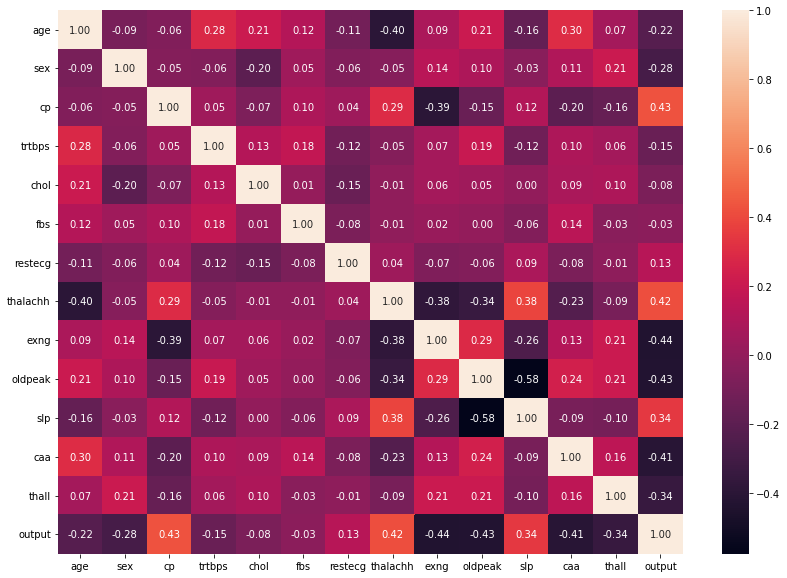

In [106]:
plt.figure(figsize=(14,10))
sns.heatmap(p_dataset.corr(), annot=True, fmt=".2f")

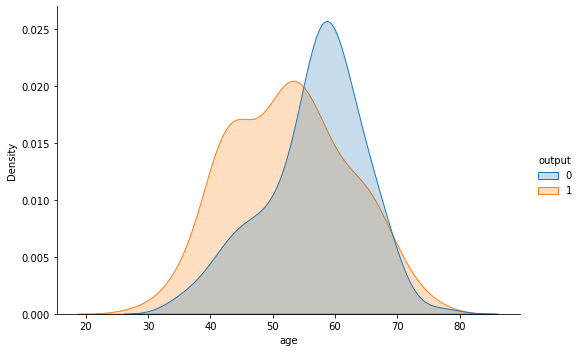

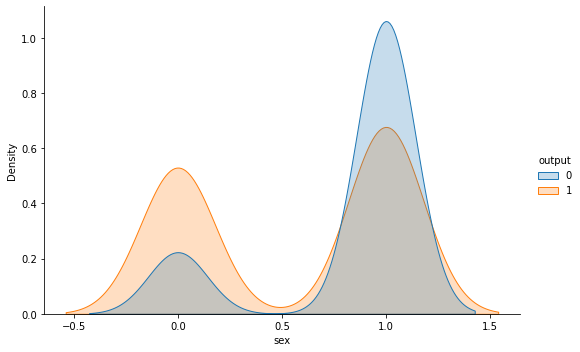

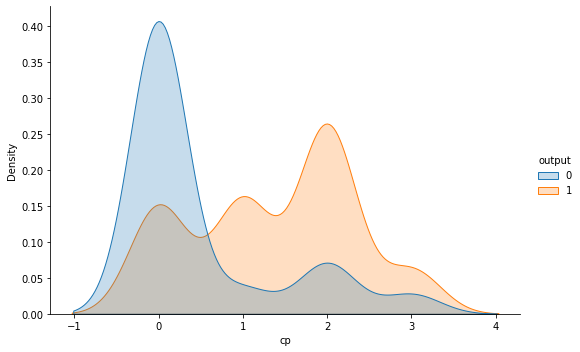

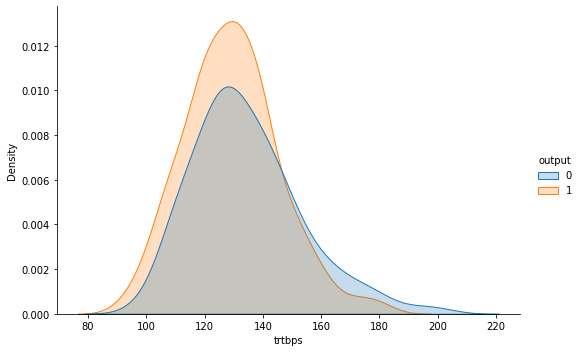

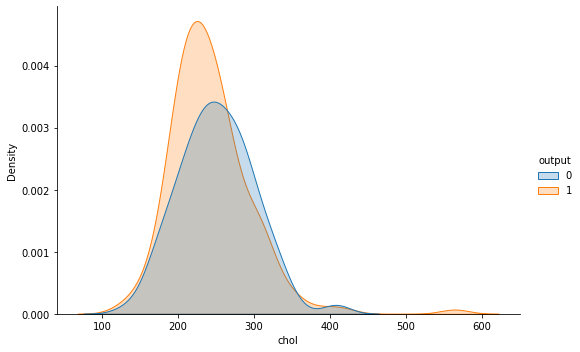

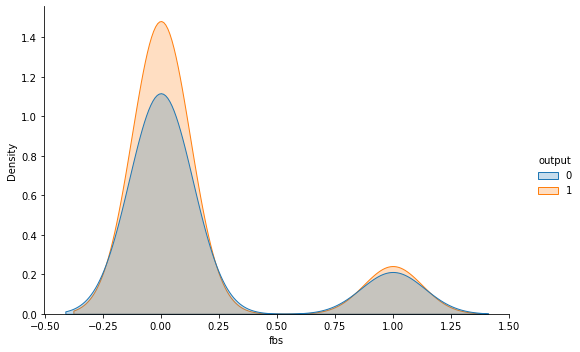

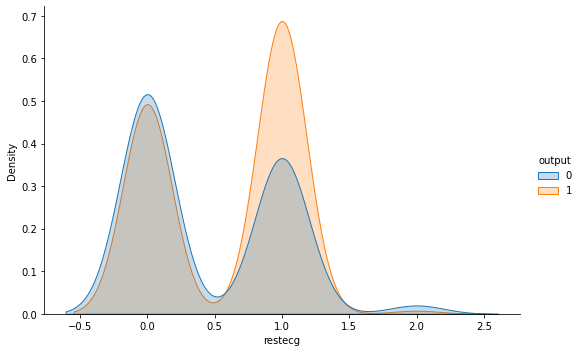

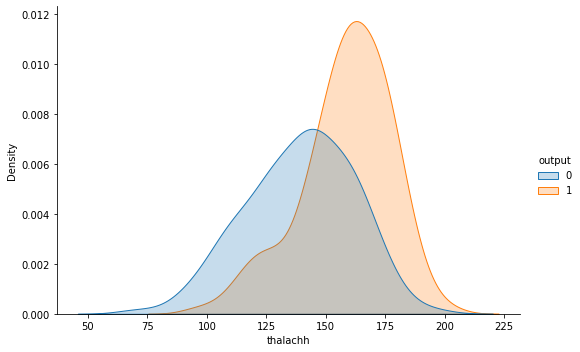

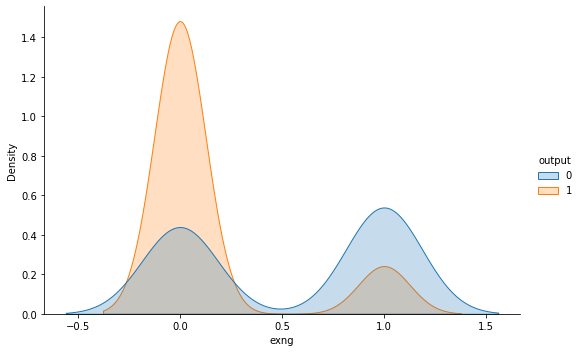

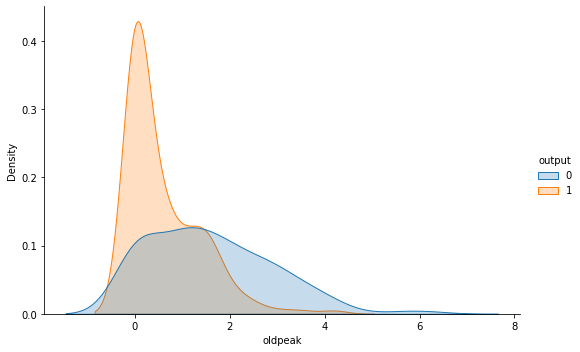

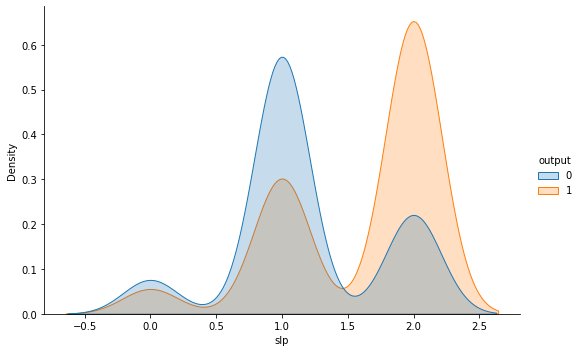

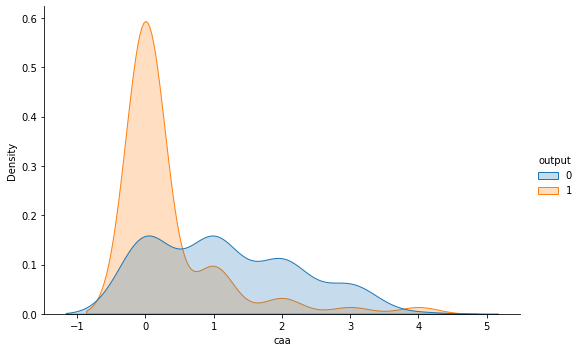

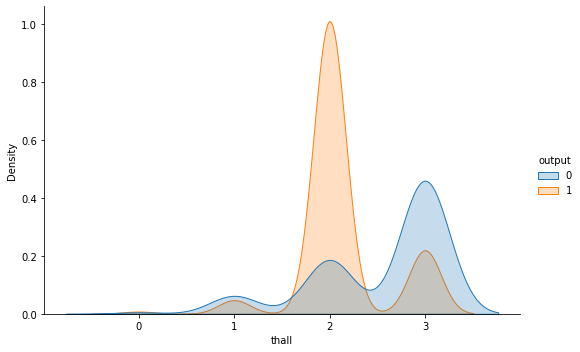

In [111]:
for feature in features:
  sns.displot(data=p_dataset, x=feature, hue='output', kind= 'kde', fill=True, height=5, aspect=1.5)

Highest accuracy: 80.21978021978022 ( NNC Model )



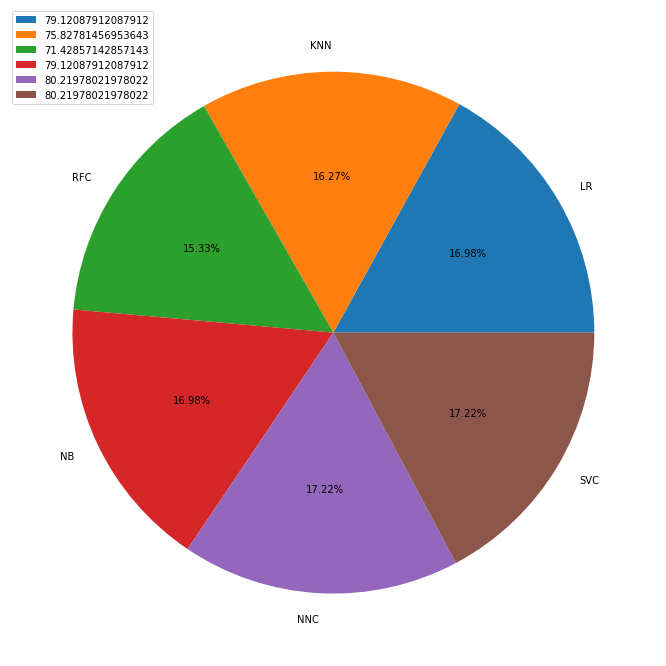

In [108]:
plt.figure(figsize=(12,12))
col=[LR,KNN,RFC,NB,NNC,SVC]
name=['LR','KNN','RFC','NB','NNC','SVC']
print('Highest accuracy:',max(col),'(',name[col.index(max(col))],'Model )\n')
plt.pie(col,labels=name,autopct='%.2f%%')
plt.legend(col)
plt.show()


## Cross Validation Scores

In [109]:
from sklearn.model_selection import cross_val_score
algorithms = [LR_model,KNN_model,RFC_model,NB_model,NNC_model,SVC_model]
for alg in algorithms:
    accuracies = cross_val_score(estimator=alg, X=features, y=target, cv=10)
    print("{0}: \t {1}".format(alg,accuracies.mean()))

LogisticRegression(max_iter=500, random_state=1): 	 0.8377419354838709
KNeighborsClassifier(n_neighbors=3): 	 0.6188172043010753
RandomForestClassifier(): 	 0.8244086021505377
GaussianNB(): 	 0.8079569892473119
MLPClassifier(hidden_layer_sizes=7, max_iter=10000): 	 0.7254838709677418
SVC(C=10, kernel='linear', random_state=1): 	 0.8408602150537634


## F1 Score

In [110]:
from sklearn.metrics import f1_score
for alg in algorithms:
    scores = f1_score(y_test, alg.predict(X_test),average=None)
    print("{0}: \t {1}".format(alg,scores))

LogisticRegression(max_iter=500, random_state=1): 	 [0.75324675 0.81904762]
KNeighborsClassifier(n_neighbors=3): 	 [0.74358974 0.80769231]
RandomForestClassifier(): 	 [0.74698795 0.78787879]
GaussianNB(): 	 [0.7654321  0.81188119]
MLPClassifier(hidden_layer_sizes=7, max_iter=10000): 	 [0.75       0.83636364]
SVC(C=10, kernel='linear', random_state=1): 	 [0.76315789 0.83018868]


## Conclusion
* We used 6 different algorithms in this notebook. Logistic Regression and SVC are better than the others in terms of accuracy score and cross validation score. Finally we got % 80 accuracy from SVC.